In [14]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

from config import omdb_api_key
from config import tmdb_api_key

In [2]:
# reads CSV of all award nominees into a DataFrame
df = pd.read_csv("Resources/data_csv.csv")
df.head()

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson


In [3]:
# searches for all Best Picture nominees using various names for the award
best_picture = df.loc[(df["category"] == "OUTSTANDING PICTURE") | 
                     (df["category"] == "OUTSTANDING PRODUCTION") |
                     (df["category"] == "OUTSTANDING MOTION PICTURE") |
                     (df["category"] == "BEST MOTION PICTURE") |
                     (df["category"] == "BEST PICTURE")]

# limits nominees to 1950 or later
# In 1950, the award started going to movie titles rather than production companies
best_picture = best_picture.loc[best_picture["year"] > 1949]
best_picture = best_picture.reset_index(drop=True)
best_picture.head()

,year,category,winner,entity
0,1950,BEST MOTION PICTURE,True,All about Eve
1,1950,BEST MOTION PICTURE,False,Born Yesterday
2,1950,BEST MOTION PICTURE,False,Father of the Bride
3,1950,BEST MOTION PICTURE,False,King Solomon's Mines
4,1950,BEST MOTION PICTURE,False,Sunset Blvd.


In [4]:
# creates series of movie titles
titles = best_picture["entity"]
titles.head()

0           All about Eve
1          Born Yesterday
2     Father of the Bride
3    King Solomon's Mines
4            Sunset Blvd.
Name: entity, dtype: object

In [5]:
# loops through titles to get TMDB movie IDs
movie_ids = []

for title in titles:
    print(f"Searching for {title}")
    try:
        url = f"https://api.themoviedb.org/3/search/movie?api_key={tmdb_api_key}&query={title}&page=1"
        response = requests.get(url)
        movie_json = response.json()
        movie_ids.append(movie_json["results"][0]["id"])
    except:
        print(f"Could not find {title}")


Searching for All about Eve
Searching for Born Yesterday
Searching for Father of the Bride
Searching for King Solomon's Mines
Searching for Sunset Blvd.
Searching for An American in Paris
Searching for Decision before Dawn
Searching for A Place in the Sun
Searching for Quo Vadis
Searching for A Streetcar Named Desire
Searching for The Greatest Show on Earth
Searching for High Noon
Searching for Ivanhoe
Searching for Moulin Rouge
Searching for The Quiet Man
Searching for From Here to Eternity
Searching for Julius Caesar
Searching for The Robe
Searching for Roman Holiday
Searching for Shane
Searching for The Caine Mutiny
Searching for The Country Girl
Searching for On the Waterfront
Searching for Seven Brides for Seven Brothers
Searching for Three Coins in the Fountain
Searching for Love Is a Many-Splendored Thing
Searching for Marty
Searching for Mister Roberts
Searching for Picnic
Searching for The Rose Tattoo
Searching for Around the World in 80 Days
Searching for Friendly Persuasion


Searching for Mystic River
Searching for Seabiscuit
Searching for The Aviator
Searching for Finding Neverland
Searching for Million Dollar Baby
Searching for Ray
Searching for Sideways
Searching for Brokeback Mountain
Searching for Capote
Searching for Crash
Searching for Good Night, and Good Luck.
Searching for Munich
Searching for Babel
Searching for The Departed
Searching for Letters from Iwo Jima
Searching for Little Miss Sunshine
Searching for The Queen
Searching for Atonement
Searching for Juno
Searching for Michael Clayton
Searching for No Country for Old Men
Searching for There Will Be Blood
Searching for The Curious Case of Benjamin Button
Searching for Frost/Nixon
Searching for Milk
Searching for The Reader
Searching for Slumdog Millionaire
Searching for Avatar
Searching for The Blind Side
Searching for District 9
Searching for An Education
Searching for The Hurt Locker
Searching for Inglourious Basterds
Searching for Precious: Based on the Novel 'Push' by Sapphire
Searching 

In [9]:
len(movie_ids)

391

In [14]:
# initializes lists to store movie informaiton
bp_titles = []
bp_budgets = []
bp_genres = []
bp_release_date = []
bp_revenue = []
bp_runtime = []

# searches TMDB by movie ID to get information
for movie_id in movie_ids:
    print(f"Searching for {movie_id}")
    try:
        url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb_api_key}"
        response = requests.get(url)
        movie_json = response.json()

        bp_genres.append(movie_json["genres"][0]["name"])
        bp_titles.append(movie_json["title"])
        bp_budgets.append(movie_json["budget"])
        bp_release_date.append(movie_json["release_date"])
        bp_revenue.append(movie_json["revenue"])
        bp_runtime.append(movie_json["runtime"])
    except:
        bp_titles.append(None)
        bp_budgets.append(None)
        bp_genres.append(None)
        bp_release_date.append(None)
        bp_revenue.append(None)
        bp_runtime.append(None)       

Searching for 705
Searching for 24481
Searching for 11846
Searching for 9838
Searching for 664159
Searching for 2769
Searching for 4461
Searching for 25673
Searching for 11620
Searching for 702
Searching for 27191
Searching for 288
Searching for 26175
Searching for 824
Searching for 3109
Searching for 11426
Searching for 18019
Searching for 29912
Searching for 804
Searching for 3110
Searching for 10178
Searching for 2438
Searching for 654
Searching for 16563
Searching for 41503
Searching for 53879
Searching for 15919
Searching for 37853
Searching for 40886
Searching for 65550
Searching for 10204
Searching for 43258
Searching for 81005
Searching for 16520
Searching for 6844
Searching for 826
Searching for 43236
Searching for 40885
Searching for 389
Searching for 37257
Searching for 16347
Searching for 261
Searching for 11414
Searching for 17281
Searching for 43136
Searching for 93
Searching for 271969
Searching for 2576
Searching for 27029
Searching for 43103
Searching for 10733
Searchi

In [17]:
# creates DataFrame with all information from lists

best_picture_data = pd.DataFrame({
    "Release Date":bp_release_date,
    "Title":bp_titles,
    "Genre":bp_genres,
    "Runtime":bp_runtime,
    "Budget":bp_budgets,
    "Revenue":bp_revenue
    
})

best_picture_data = best_picture_data.dropna()
best_picture_data

,Release Date,Title,Genre,Runtime,Budget,Revenue
0,1950-10-06,All About Eve,Drama,139.0,1400000.0,1.504380e+05
1,1950-12-25,Born Yesterday,Comedy,103.0,0.0,0.000000e+00
2,1991-12-20,Father of the Bride,Comedy,105.0,0.0,8.932578e+07
3,1985-11-22,King Solomon's Mines,Action,100.0,12500000.0,2.382270e+05
4,2019-12-19,Ed Ruscha - Motorized Photographs of Sunset Bl...,Documentary,2.0,0.0,0.000000e+00
...,...,...,...,...,...,...
385,2019-10-18,Jojo Rabbit,Comedy,108.0,14000000.0,8.246870e+07
386,2019-10-02,Joker,Crime,122.0,55000000.0,1.074251e+09
388,2019-11-06,Marriage Story,Drama,137.0,19000000.0,2.300000e+06
389,2019-12-25,1917,War,119.0,100000000.0,3.747339e+08


In [18]:
best_picture_data.to_csv('Output/best_picture_noms.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Output/best_picture_noms.csv'

In [16]:
genre=best_picture_data['Genre'].value_counts()
genre_type=best_picture_data['Genre'].unique()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

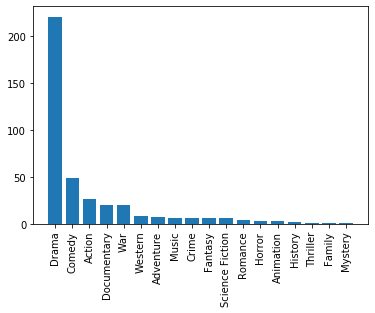

In [17]:
plt.bar(genre_type, genre)
plt.xticks(rotation='vertical')

In [ ]:
#Originally planned to also look at how the winning genre changed over time but given the overwhelming amount of drama
#there would not be any noticible patterns to see.